In [17]:
# Create our VLM application and load some urls to process
from vlm_apps.application import Application
from vlm.utils import download_image

app_name = 'nfl_plays'
app = Application.get(app_name)

URLS = [
    "https://static.www.nfl.com/image/private/t_editorial_landscape_12_desktop/league/osfac1nvcxkjdfa5yhtn",
    "https://i.insider.com/5e24c8ba62fa813a7d022fe3?width=1200&format=jpeg",
    "https://pbs.twimg.com/amplify_video_thumb/1485009987269128195/img/JIIA0Cea5o1LpkHZ.jpg:large",
    "https://static.www.nfl.com/image/private/t_editorial_landscape_12_desktop/league/d33yyhuped2bmobifqoy",
    "https://static.www.nfl.com/image/upload/t_editorial_landscape_12_desktop/league/hid31t8byzxfpz0vtak4",
    "https://cdn-images-1.medium.com/max/800/1*eluBF0MOTAqNCSc4vCEXmQ.png",
    "https://cdn.geekwire.com/wp-content/uploads/2017/12/Screen-Shot-2017-09-28-at-5.50.14-PM-1260x700-630x350.png",
    "https://pbs.twimg.com/amplify_video_thumb/1738699907484065792/img/s-pzq7wLBByXvsuX.jpg",
]

frames = (download_image(_url) for _url in URLS)

In [18]:
# Init our airtable API
import os
from pyairtable import Api

airtable_app_id = os.getenv("AIRTABLE_APP_ID")
airtable_table_name = os.getenv("AIRTABLE_TABLE_NAME")
airtable_table_name = 'nfl_plays_cookbook'
airtable_auth = os.getenv("AIRTABLE_AUTH_KEY")
print('init airtable with auth key: ', airtable_auth)
api = Api(api_key=airtable_auth)

init airtable with auth key:  pat0X1VzA8RSsCf9h.679e5ecd9da6ca6d76e2b97bf112b53b39f98ab9b1de19d9fbf74a766155c135

In [19]:
# Create a table based on the response model/schema for nfl plays
base = api.bases()[0]
fields = []
for field in app.response_model.__annotations__.keys():
    fields.append({"description": f"Description for {field}", "name": field, "type": "singleLineText"})

# Catch exception if table already exists and just return it
try:
    table = base.create_table(airtable_table_name, fields)
except Exception:
    table = base.table(airtable_table_name)

In [20]:
from typing import Callable, Iterable, TypeVar, Union
from vlm.utils import extract_markdown_table, extract_response
from rich import print as rprint
from rich import print_json as rprint_json
from PIL import Image
from vlm.models import gpt4v
import numpy as np

T = TypeVar("T")

def describe_image(
    img_or_path: Union[str, Image.Image],
    prompt: str,
    response_model: T = None,
    model: Callable = gpt4v,
    max_tokens: int = 1024,
    verbose: bool = False,
) -> T:
    """Describe the scene in the image using the given model."""
    # Open the image
    if isinstance(img_or_path, str):
        img = Image.open(img_or_path)
    elif isinstance(img_or_path, Image.Image):
        img = img_or_path
    elif isinstance(img_or_path, np.ndarray):
        img = Image.fromarray(img_or_path).convert("RGB")
    else:
        raise ValueError(f"Invalid type for img_or_path: {type(img_or_path)}")
    W, H = img.size
    if verbose:
        display(img.resize((W // 4, H // 4)))

    # Get the scene description
    response = model(img, prompt=prompt, max_tokens=max_tokens)
    if verbose:
        rprint(f"response: [yellow]{response}[/yellow]")

    # Extract the typed-response
    if response_model is None:
        return response
    typed_response = extract_response(response, response_model=response_model, verbose=verbose)
    rprint_json(typed_response.model_dump_json(), highlight=False)
    return typed_response

Scene Descriptions

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────

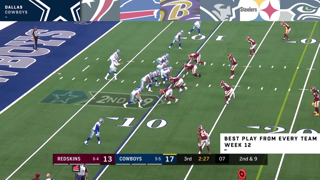

2024-03-27 13:51:36.817 | DEBUG    | vlm.integrations.openai:gpt4v:114 - Requesting prediction (model_id=gpt4v, image=<PIL.Image.Image image mode=RGB size=1280x720 at 0x10D49F450>, prompt=
Describe what is in this image in JSON with the following JSON schema:

{
  "properties": {
    "cls_name": {
      "default":  ..., detail=auto, max_tokens=1024)


response: ```json
{
  "cls_name": "SceneDescription",
  "home_team": "Dallas Cowboys",
  "away_team": "Washington Redskins",
  "home_score": "17",
  "away_score": "13",
  "possession_team": "Dallas Cowboys",
  "quarter": "3rd",
  "clock_time": "2:27",
  "down": "2nd & 9",
  "network": null
}
```

json_response
{
  "cls_name": "SceneDescription",
  "home_team": "Dallas Cowboys",
  "away_team": "Washington Redskins",
  "home_score": "17",
  "away_score": "13",
  "possession_team": "Dallas Cowboys",
  "quarter": "3rd",
  "clock_time": "2:27",
  "down": "2nd & 9",
  "network": null
}

{
  "cls_name": "SceneDescription",
  "home_team": "Dallas Cowboys",
  "away_team": "Washington Redskins",
  "home_score": "17",
  "away_score": "13",
  "possession_team": "Dallas Cowboys",
  "quarter": "3rd",
  "clock_time": "2:27",
  "down": "2nd & 9",
  "network": null
}

{
    'cls_name': 'SceneDescription',
    'home_team': 'Dallas Cowboys',
    'away_team': 'Washington Redskins',
    'home_score': '17',
    'away_score': '13',
    'possession_team': 'Dallas Cowboys',
    'quarter': '3rd',
    'clock_time': '2:27',
    'down': '2nd & 9',
    'network': None
}

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────

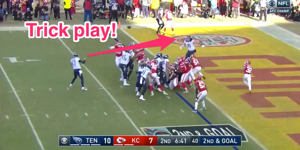

2024-03-27 13:51:37.632 | DEBUG    | vlm.integrations.openai:gpt4v:114 - Requesting prediction (model_id=gpt4v, image=<PIL.Image.Image image mode=RGB size=1200x600 at 0x11458B250>, prompt=
Describe what is in this image in JSON with the following JSON schema:

{
  "properties": {
    "cls_name": {
      "default":  ..., detail=auto, max_tokens=1024)


response: ```json
{
  "cls_name": "SceneDescription",
  "home_team": "Kansas City Chiefs",
  "away_team": "Tennessee Titans",
  "home_score": "7",
  "away_score": "10",
  "possession_team": "Tennessee Titans",
  "quarter": "2nd",
  "clock_time": "6:41",
  "down": "2nd & GOAL",
  "network": "CBS"
}
```

json_response
{
  "cls_name": "SceneDescription",
  "home_team": "Kansas City Chiefs",
  "away_team": "Tennessee Titans",
  "home_score": "7",
  "away_score": "10",
  "possession_team": "Tennessee Titans",
  "quarter": "2nd",
  "clock_time": "6:41",
  "down": "2nd & GOAL",
  "network": "CBS"
}

{
  "cls_name": "SceneDescription",
  "home_team": "Kansas City Chiefs",
  "away_team": "Tennessee Titans",
  "home_score": "7",
  "away_score": "10",
  "possession_team": "Tennessee Titans",
  "quarter": "2nd",
  "clock_time": "6:41",
  "down": "2nd & GOAL",
  "network": "CBS"
}

{
    'cls_name': 'SceneDescription',
    'home_team': 'Kansas City Chiefs',
    'away_team': 'Tennessee Titans',
    'home_score': '7',
    'away_score': '10',
    'possession_team': 'Tennessee Titans',
    'quarter': '2nd',
    'clock_time': '6:41',
    'down': '2nd & GOAL',
    'network': 'CBS'
}

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────

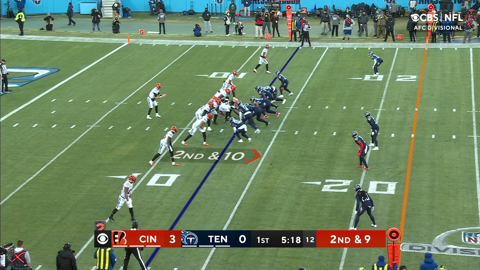

2024-03-27 13:51:38.962 | DEBUG    | vlm.integrations.openai:gpt4v:114 - Requesting prediction (model_id=gpt4v, image=<PIL.Image.Image image mode=RGB size=1920x1080 at 0x1159269D0>, prompt=
Describe what is in this image in JSON with the following JSON schema:

{
  "properties": {
    "cls_name": {
      "default":  ..., detail=auto, max_tokens=1024)


response: ```json
{
  "cls_name": "SceneDescription",
  "home_team": "Tennessee Titans",
  "away_team": "Cincinnati Bengals",
  "home_score": "0",
  "away_score": "3",
  "possession_team": "Tennessee Titans",
  "quarter": "1st",
  "clock_time": "5:18",
  "down": "2nd & 9",
  "network": "CBS"
}
```

json_response
{
  "cls_name": "SceneDescription",
  "home_team": "Tennessee Titans",
  "away_team": "Cincinnati Bengals",
  "home_score": "0",
  "away_score": "3",
  "possession_team": "Tennessee Titans",
  "quarter": "1st",
  "clock_time": "5:18",
  "down": "2nd & 9",
  "network": "CBS"
}

{
  "cls_name": "SceneDescription",
  "home_team": "Tennessee Titans",
  "away_team": "Cincinnati Bengals",
  "home_score": "0",
  "away_score": "3",
  "possession_team": "Tennessee Titans",
  "quarter": "1st",
  "clock_time": "5:18",
  "down": "2nd & 9",
  "network": "CBS"
}

{
    'cls_name': 'SceneDescription',
    'home_team': 'Tennessee Titans',
    'away_team': 'Cincinnati Bengals',
    'home_score': '0',
    'away_score': '3',
    'possession_team': 'Tennessee Titans',
    'quarter': '1st',
    'clock_time': '5:18',
    'down': '2nd & 9',
    'network': 'CBS'
}

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────

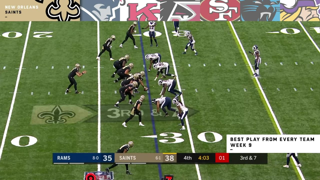

2024-03-27 13:51:39.828 | DEBUG    | vlm.integrations.openai:gpt4v:114 - Requesting prediction (model_id=gpt4v, image=<PIL.Image.Image image mode=RGB size=1280x720 at 0x115E696D0>, prompt=
Describe what is in this image in JSON with the following JSON schema:

{
  "properties": {
    "cls_name": {
      "default":  ..., detail=auto, max_tokens=1024)


response: ```json
{
  "cls_name": "SceneDescription",
  "home_team": "New Orleans Saints",
  "away_team": "Los Angeles Rams",
  "home_score": "38",
  "away_score": "35",
  "possession_team": "New Orleans Saints",
  "quarter": "4th",
  "clock_time": "4:03",
  "down": "3rd & 7",
  "network": null
}
```

json_response
{
  "cls_name": "SceneDescription",
  "home_team": "New Orleans Saints",
  "away_team": "Los Angeles Rams",
  "home_score": "38",
  "away_score": "35",
  "possession_team": "New Orleans Saints",
  "quarter": "4th",
  "clock_time": "4:03",
  "down": "3rd & 7",
  "network": null
}

{
  "cls_name": "SceneDescription",
  "home_team": "New Orleans Saints",
  "away_team": "Los Angeles Rams",
  "home_score": "38",
  "away_score": "35",
  "possession_team": "New Orleans Saints",
  "quarter": "4th",
  "clock_time": "4:03",
  "down": "3rd & 7",
  "network": null
}

{
    'cls_name': 'SceneDescription',
    'home_team': 'New Orleans Saints',
    'away_team': 'Los Angeles Rams',
    'home_score': '38',
    'away_score': '35',
    'possession_team': 'New Orleans Saints',
    'quarter': '4th',
    'clock_time': '4:03',
    'down': '3rd & 7',
    'network': None
}

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────

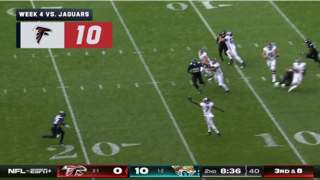

2024-03-27 13:51:40.662 | DEBUG    | vlm.integrations.openai:gpt4v:114 - Requesting prediction (model_id=gpt4v, image=<PIL.Image.Image image mode=RGB size=1280x720 at 0x114236F50>, prompt=
Describe what is in this image in JSON with the following JSON schema:

{
  "properties": {
    "cls_name": {
      "default":  ..., detail=auto, max_tokens=1024)


response: ```json
{
  "cls_name": "SceneDescription",
  "home_team": "Jacksonville Jaguars",
  "away_team": "Atlanta Falcons",
  "home_score": "0",
  "away_score": "10",
  "possession_team": "Jacksonville Jaguars",
  "quarter": "2ND",
  "clock_time": "8:36",
  "down": "3RD & 8",
  "network": "NFL on ESPN"
}
```

json_response
{
  "cls_name": "SceneDescription",
  "home_team": "Jacksonville Jaguars",
  "away_team": "Atlanta Falcons",
  "home_score": "0",
  "away_score": "10",
  "possession_team": "Jacksonville Jaguars",
  "quarter": "2ND",
  "clock_time": "8:36",
  "down": "3RD & 8",
  "network": "NFL on ESPN"
}

{
  "cls_name": "SceneDescription",
  "home_team": "Jacksonville Jaguars",
  "away_team": "Atlanta Falcons",
  "home_score": "0",
  "away_score": "10",
  "possession_team": "Jacksonville Jaguars",
  "quarter": "2ND",
  "clock_time": "8:36",
  "down": "3RD & 8",
  "network": "NFL on ESPN"
}

{
    'cls_name': 'SceneDescription',
    'home_team': 'Jacksonville Jaguars',
    'away_team': 'Atlanta Falcons',
    'home_score': '0',
    'away_score': '10',
    'possession_team': 'Jacksonville Jaguars',
    'quarter': '2ND',
    'clock_time': '8:36',
    'down': '3RD & 8',
    'network': 'NFL on ESPN'
}

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────

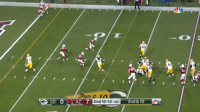

2024-03-27 13:51:41.723 | DEBUG    | vlm.integrations.openai:gpt4v:114 - Requesting prediction (model_id=gpt4v, image=<PIL.Image.Image image mode=RGB size=800x450 at 0x11592B990>, prompt=
Describe what is in this image in JSON with the following JSON schema:

{
  "properties": {
    "cls_name": {
      "default":  ..., detail=auto, max_tokens=1024)


response: ```json
{
  "cls_name": "SceneDescription",
  "home_team": "Green Bay Packers",
  "away_team": "Arizona Cardinals",
  "home_score": "0",
  "away_score": "7",
  "possession_team": "Green Bay Packers",
  "quarter": "2nd",
  "clock_time": "12:12",
  "down": "2nd & 10",
  "network": "NBC"
}
```

json_response
{
  "cls_name": "SceneDescription",
  "home_team": "Green Bay Packers",
  "away_team": "Arizona Cardinals",
  "home_score": "0",
  "away_score": "7",
  "possession_team": "Green Bay Packers",
  "quarter": "2nd",
  "clock_time": "12:12",
  "down": "2nd & 10",
  "network": "NBC"
}

{
  "cls_name": "SceneDescription",
  "home_team": "Green Bay Packers",
  "away_team": "Arizona Cardinals",
  "home_score": "0",
  "away_score": "7",
  "possession_team": "Green Bay Packers",
  "quarter": "2nd",
  "clock_time": "12:12",
  "down": "2nd & 10",
  "network": "NBC"
}

{
    'cls_name': 'SceneDescription',
    'home_team': 'Green Bay Packers',
    'away_team': 'Arizona Cardinals',
    'home_score': '0',
    'away_score': '7',
    'possession_team': 'Green Bay Packers',
    'quarter': '2nd',
    'clock_time': '12:12',
    'down': '2nd & 10',
    'network': 'NBC'
}

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────

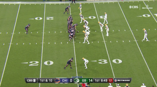

2024-03-27 13:51:42.475 | DEBUG    | vlm.integrations.openai:gpt4v:114 - Requesting prediction (model_id=gpt4v, image=<PIL.Image.Image image mode=RGB size=630x350 at 0x113E98650>, prompt=
Describe what is in this image in JSON with the following JSON schema:

{
  "properties": {
    "cls_name": {
      "default":  ..., detail=auto, max_tokens=1024)


response: ```json
{
  "cls_name": "SceneDescription",
  "home_team": "Chicago Bears",
  "away_team": "Green Bay Packers",
  "home_score": "0",
  "away_score": "14",
  "possession_team": "Chicago Bears",
  "quarter": "1st",
  "clock_time": "8:49",
  "down": "1st & 10",
  "network": "CBS"
}
```

json_response
{
  "cls_name": "SceneDescription",
  "home_team": "Chicago Bears",
  "away_team": "Green Bay Packers",
  "home_score": "0",
  "away_score": "14",
  "possession_team": "Chicago Bears",
  "quarter": "1st",
  "clock_time": "8:49",
  "down": "1st & 10",
  "network": "CBS"
}

{
  "cls_name": "SceneDescription",
  "home_team": "Chicago Bears",
  "away_team": "Green Bay Packers",
  "home_score": "0",
  "away_score": "14",
  "possession_team": "Chicago Bears",
  "quarter": "1st",
  "clock_time": "8:49",
  "down": "1st & 10",
  "network": "CBS"
}

{
    'cls_name': 'SceneDescription',
    'home_team': 'Chicago Bears',
    'away_team': 'Green Bay Packers',
    'home_score': '0',
    'away_score': '14',
    'possession_team': 'Chicago Bears',
    'quarter': '1st',
    'clock_time': '8:49',
    'down': '1st & 10',
    'network': 'CBS'
}

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────

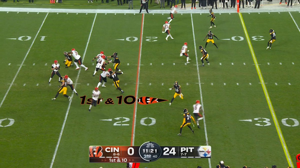

2024-03-27 13:51:43.327 | DEBUG    | vlm.integrations.openai:gpt4v:114 - Requesting prediction (model_id=gpt4v, image=<PIL.Image.Image image mode=RGB size=1200x675 at 0x113EDAC10>, prompt=
Describe what is in this image in JSON with the following JSON schema:

{
  "properties": {
    "cls_name": {
      "default":  ..., detail=auto, max_tokens=1024)


response: ```json
{
  "cls_name": "SceneDescription",
  "home_team": "Pittsburgh Steelers",
  "away_team": "Cincinnati Bengals",
  "home_score": "24",
  "away_score": "0",
  "possession_team": "Cincinnati Bengals",
  "quarter": "3rd",
  "clock_time": "11:21",
  "down": "1st & 10",
  "network": "Steelers"
}
```

json_response
{
  "cls_name": "SceneDescription",
  "home_team": "Pittsburgh Steelers",
  "away_team": "Cincinnati Bengals",
  "home_score": "24",
  "away_score": "0",
  "possession_team": "Cincinnati Bengals",
  "quarter": "3rd",
  "clock_time": "11:21",
  "down": "1st & 10",
  "network": "Steelers"
}

{
  "cls_name": "SceneDescription",
  "home_team": "Pittsburgh Steelers",
  "away_team": "Cincinnati Bengals",
  "home_score": "24",
  "away_score": "0",
  "possession_team": "Cincinnati Bengals",
  "quarter": "3rd",
  "clock_time": "11:21",
  "down": "1st & 10",
  "network": "Steelers"
}

{
    'cls_name': 'SceneDescription',
    'home_team': 'Pittsburgh Steelers',
    'away_team': 'Cincinnati Bengals',
    'home_score': '24',
    'away_score': '0',
    'possession_team': 'Cincinnati Bengals',
    'quarter': '3rd',
    'clock_time': '11:21',
    'down': '1st & 10',
    'network': 'Steelers'
}

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────

In [21]:
from IPython.display import Markdown, display
from rich import print
from rich.markdown import Markdown
from rich.table import Table

# process our urls one by one, updating airtable as we go:
# render as markdown
print(Markdown("## Scene Descriptions"))
print(Markdown("---"))
for _idx, img in enumerate(frames):
    try:
        response = describe_image(
            img,
            prompt=app.prompt,
            response_model=app.response_model,
            model=app.model,
            max_tokens=1024,
            verbose=True,
        )
    except Exception:
        print("Failed to process image")
        continue

    # update the airtable record
    assert table, "Table not created"
    # create record in table for image annotations
    all_fields = {field : getattr(response, field) for field in response.__annotations__.keys()}
    table.create(all_fields)

    response_json = None
    try:
        response_json = response.dict()
        print(response_json)
    except Exception:
        print(Markdown(response))

    if response_json and "tables" in response_json and response.tables:
        print(Markdown("**Tables**"))
        for _idx, table in enumerate(response.tables):
            print(f"Table (title={table.title})")
            try:
                print(Markdown(extract_markdown_table(table.markdown).to_markdown()))
            except Exception:
                print(Markdown("Failed to print table"))
            print(Markdown(f"Caption: {table.caption}"))

    if response_json and "plots" in response_json and response.plots:
        print(Markdown("**Plots**"))
        for _idx, plot in enumerate(response.plots):
            print(Markdown(f"Plot (title={plot.title})"))
            try:
                print(Markdown(extract_markdown_table(plot.markdown).to_markdown()))
            except Exception:
                print(Markdown("Failed to print plot"))
            print(Markdown(f"Caption: {plot.caption}"))
    print(Markdown("---"))
print(Markdown(""))